# Task 2: Unemployment Analysis!

# **Performed by Pratik Pol**

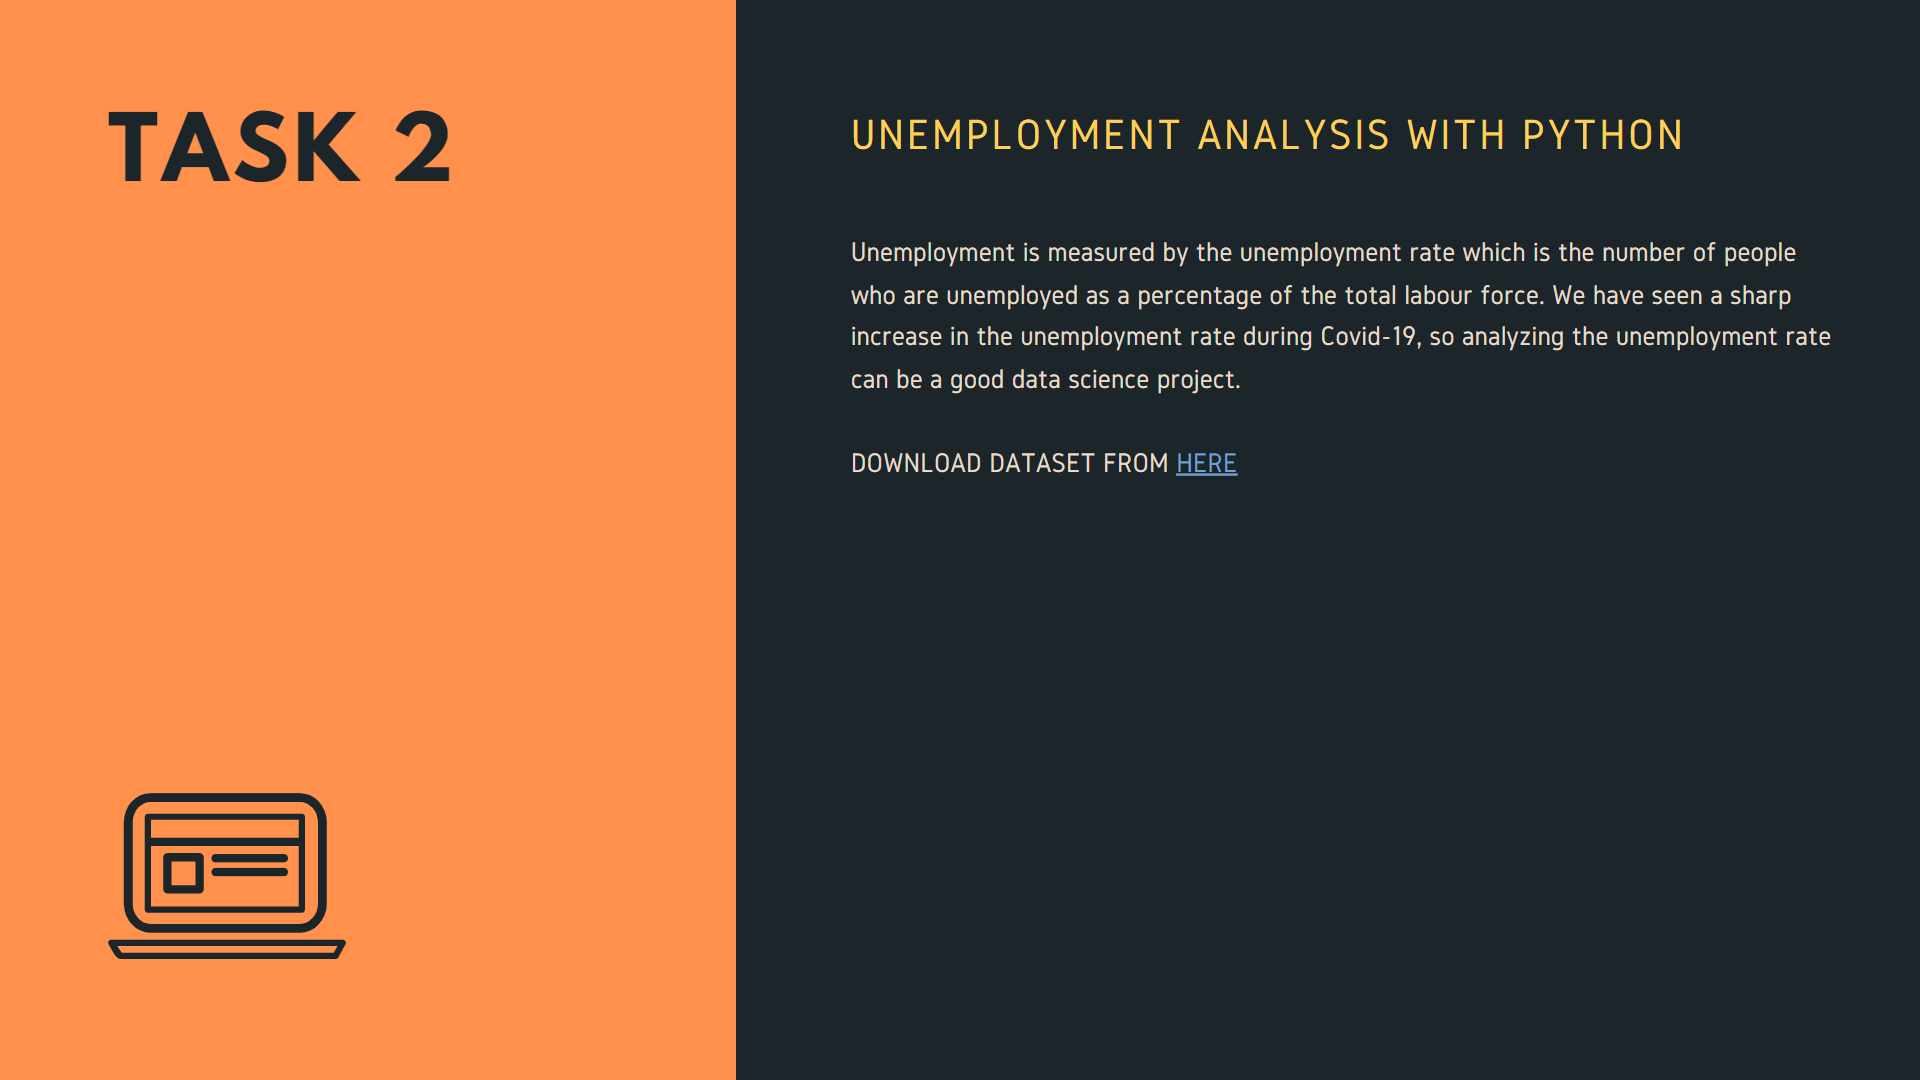

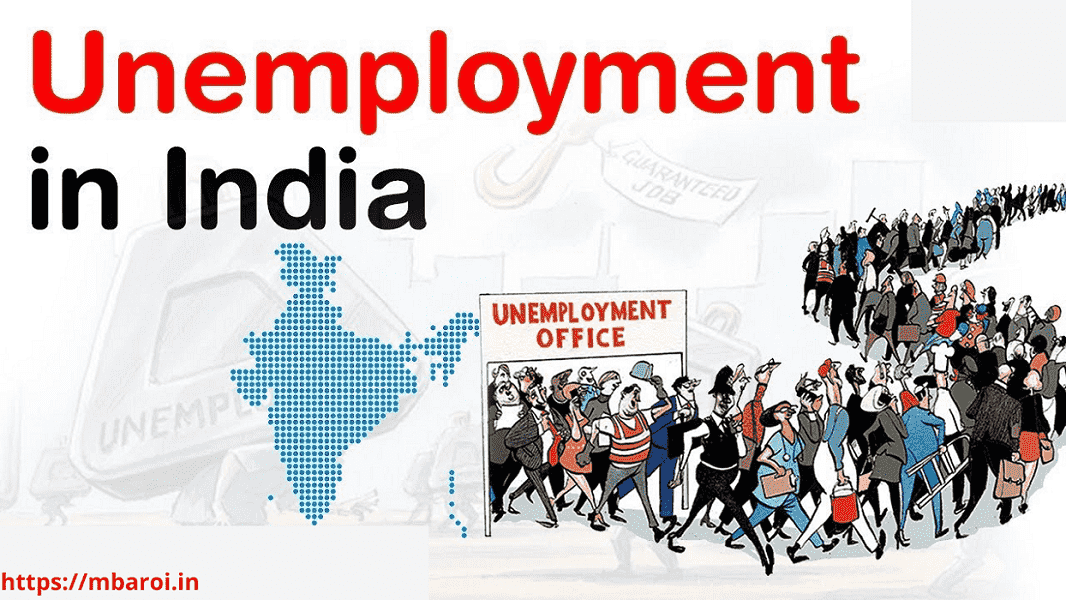

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Importing data**

In [3]:
data = pd.read_csv("Unemployment in India.csv");

In [4]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(768, 7)

**Check if their is any Null values present in the data!**

In [6]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

**We have dropped the null values**

In [9]:
data.shape

(740, 7)

In [10]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [11]:
data.describe().round()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.0,740.0,740.0
mean,12.0,7204460.0,43.0
std,11.0,8087988.0,8.0
min,0.0,49420.0,13.0
25%,5.0,1190404.0,38.0
50%,8.0,4744178.0,41.0
75%,16.0,11275490.0,46.0
max,77.0,45777509.0,73.0


In [12]:
data.corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


**We can observe that their are three columns with float datatype and four columns with object datatype!**

**Data Wrangling**

In [14]:
data.sample(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
46,Chhattisgarh,30-11-2019,Monthly,2.77,6942931.0,43.56,Rural
225,Odisha,31-01-2020,Monthly,1.81,11182128.0,39.09,Rural
498,Himachal Pradesh,31-08-2019,Monthly,24.48,236315.0,51.17,Urban
719,Uttar Pradesh,31-12-2019,Monthly,12.37,13857200.0,40.21,Urban
454,Delhi,30-06-2020,Monthly,18.11,4306807.0,34.32,Urban
593,Meghalaya,30-09-2019,Monthly,5.30,253887.0,50.77,Urban
679,Tamil Nadu,29-02-2020,Monthly,3.31,11742101.0,37.48,Urban
672,Tamil Nadu,31-07-2019,Monthly,3.18,12054414.0,38.89,Urban
151,Karnataka,30-09-2019,Monthly,3.20,13741892.0,44.45,Rural
206,Meghalaya,31-08-2019,Monthly,0.52,1065725.0,60.86,Rural


**#Converting the date into datetime format**

In [15]:
data['Date']=pd.to_datetime(data[' Date'])

In [16]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30
...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,2020-02-29
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,2020-03-31
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,2020-04-30
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,2020-05-31


**Extracting the year and month from the date**

In [17]:
year=[i.strftime('%Y') for i in list(data['Date'])]
month=[i.strftime('%B') for i in list(data['Date'])]

In [18]:
data['Year']=year
data['Month']=month

In [19]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Year,Month
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31,2019,May
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30,2019,June
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31,2019,July
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31,2019,August
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30,2019,September
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,2020-02-29,2020,February
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,2020-03-31,2020,March
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,2020-04-30,2020,April
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,2020-05-31,2020,May


**EDA**

In [20]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Date', 'Year', 'Month'],
      dtype='object')

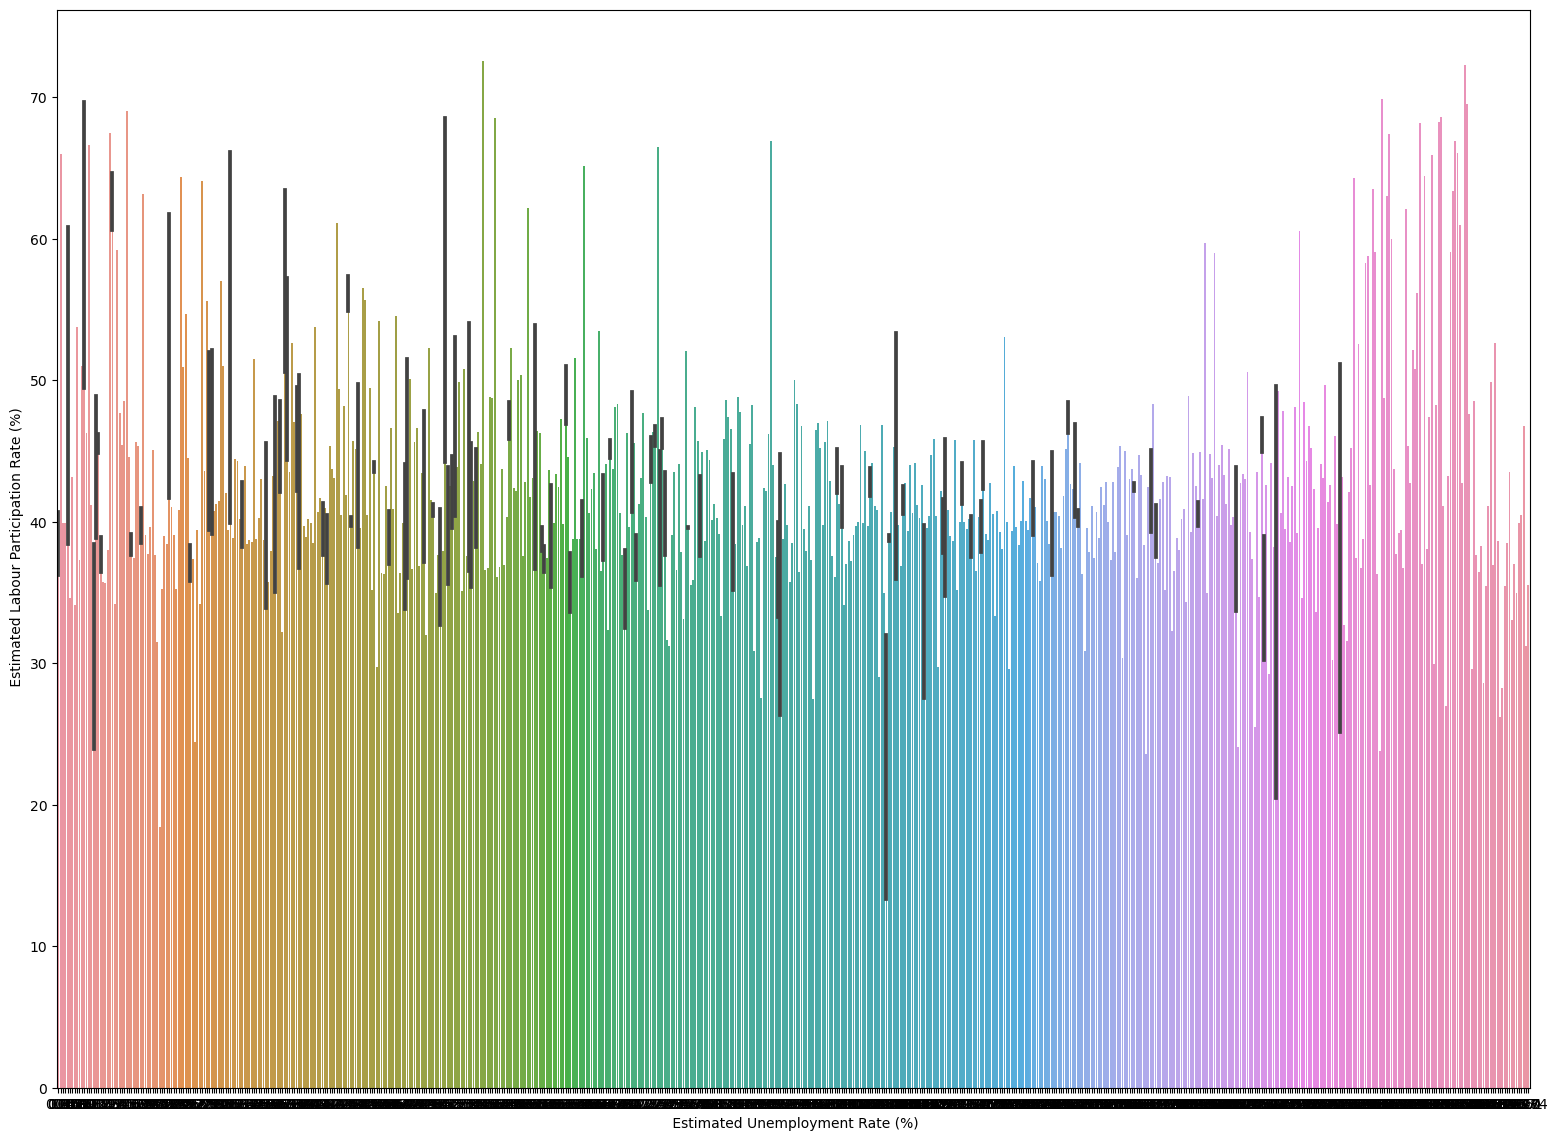

In [21]:
plt.figure(figsize=(19,14))
sns.barplot(x=data[" Estimated Unemployment Rate (%)"], y=data[" Estimated Labour Participation Rate (%)"]);

**Area wise unemployment analysis**

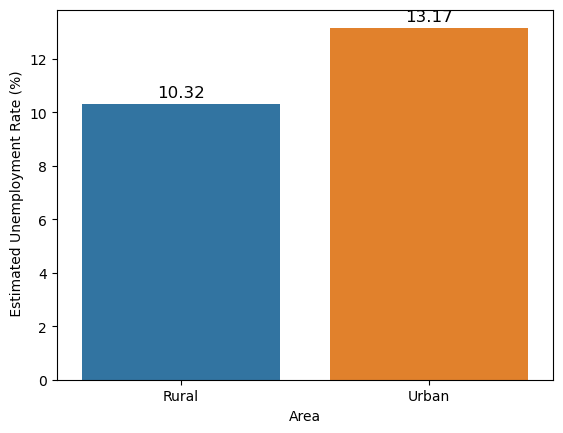

In [22]:
area_unemploy=data.groupby(['Area'],as_index=False)[' Estimated Unemployment Rate (%)'].mean()
area_unemploy_plot=sns.barplot(data=area_unemploy,x='Area',y=' Estimated Unemployment Rate (%)')
for bar in area_unemploy_plot.patches:
    area_unemploy_plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

**We can conclude that Urban is having 13.17 of unemployment and Rural is having 10.32 of unemployment**

**Take the mean of rate state by state**

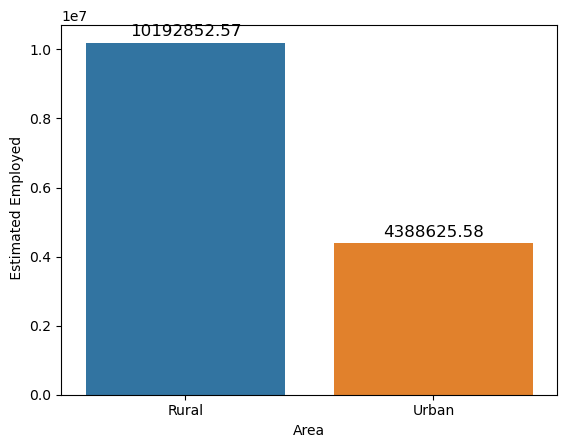

In [27]:
area_emp=data.groupby(['Area'],as_index=False)[' Estimated Employed'].mean()
area_emp_plot=sns.barplot(data=area_emp,x='Area',y=' Estimated Employed')
for bar in area_emp_plot.patches:
    area_emp_plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

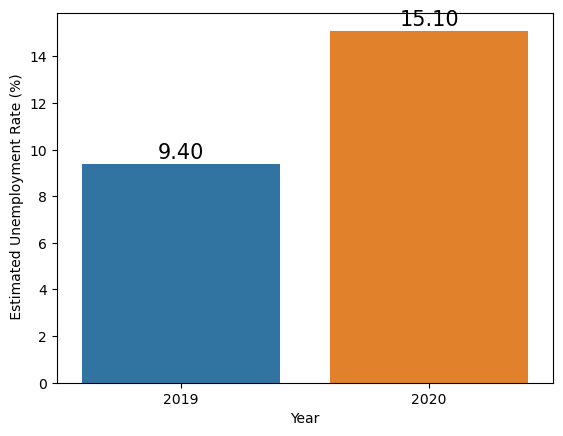

In [28]:
plot=sns.barplot(x='Year',y=' Estimated Unemployment Rate (%)',data=data.groupby('Year',as_index=False)[' Estimated Unemployment Rate (%)'].mean())

for bar in plot.patches:
 
  plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

## Conclusions: